In [ ]:
from MovieBookAnalysis import *
%matplotlib inline

In [2]:
IMDB_ratings = pd.read_csv('datafiles/movie_books_IMDB_ratings.csv', index_col=0)

In [3]:
GR_ratings = pd.read_csv('datafiles/movie_books_GR_ratings.csv', index_col=0)

In [5]:
MC_ratings = pd.read_csv('datafiles/movie_books_MC_ratings.csv', index_col=0)

In [6]:
dummies = pd.get_dummies(IMDB_ratings.MPAArating)
IMDB_ratings = pd.concat([IMDB_ratings, dummies], axis=1)
IMDB_ratings = IMDB_ratings.rename(columns = {'PG-13':'PG13'})

## Compare IMDB user ratings against GR user ratings

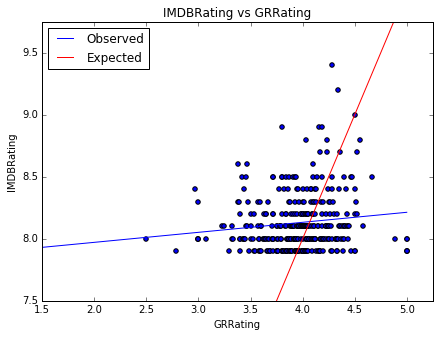

In [10]:
plotMovieRatingAgainstGR(IMDB_ratings, GR_ratings, 'IMDBRating', col2='GRRating', ymin=7.5, ymax=10, xmin=1.5, xmax=5.25, ylim=9.75)

In [11]:
IMDB_GR_OLS = getOLSResults(IMDB_ratings, GR_ratings, 'IMDBRating', col2='GRRating')

IMDBRating ~ GRRating


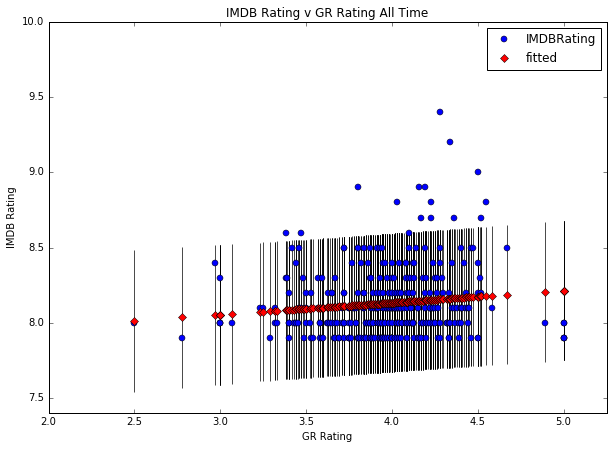

In [12]:
plotByResults(IMDB_GR_OLS, 'IMDB Rating v GR Rating All Time', 'GR Rating', 'IMDB Rating', [2,5.25], [7.4,10])

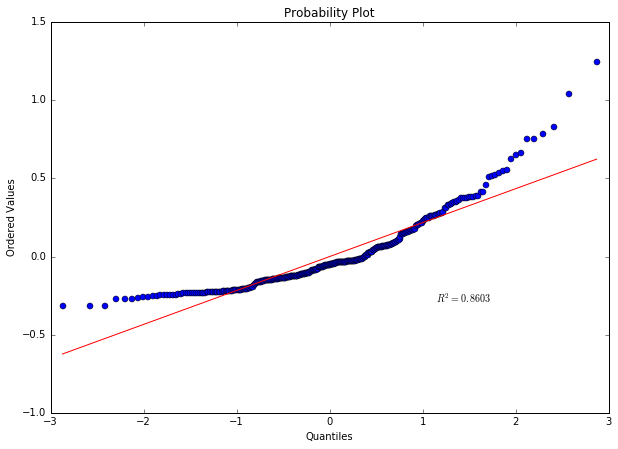

In [13]:
getQQPlot(IMDB_GR_OLS)

In [14]:
IMDB_GR_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             IMDBRating   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     5.081
Date:                Thu, 28 Jan 2016   Prob (F-statistic):             0.0248
Time:                        15:32:33   Log-Likelihood:                 13.610
No. Observations:                 339   AIC:                            -23.22
Df Residuals:                     337   BIC:                            -15.57
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      7.8099      0.143     54.760      0.000         7.529     8.090
GRRating       0.0808      0.036      2.254      0.025         0.010     0.151
==============================================================================
Omnibus:                      123.015   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              371.976
Skew:                           1.670   Prob(JB):                     1.68e-81
Kurtosis:                       6.896   Cond. No.                         47.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
z_IMDB_GR_movies = getZscoreDiffofMovieAndBook(IMDB_ratings, GR_ratings, 'IMDBRating', 'GRRating', want='bettermovies')
    

/Users/kenn/Learning/ds/metis/projects/luther/ken_m/MovieBookAnalysis.py:169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[(col+'_zscore')] = (df[col] - df[col].mean())/df[col].std(ddof=0)


In [16]:
z_IMDB_GR_movies.head(10)

,Title,IMDBRating,GRRating,ZS_diff
0,Hababam Sinifi,9.4,4.28,4.309350
309,Mishima: A Life in Four Chapters,7.9,2.00,4.306047
44,Bicycle Thieves,8.4,2.97,3.737984
5,Morometii,8.9,3.80,3.549364
15,La Celestina,8.6,3.38,3.451133
264,Marele singuratic,8.0,2.50,3.363082
1,The Godfather,9.2,4.34,3.322359
71,Make Way for Tomorrow,8.3,3.00,3.244489
14,It's a Wonderful Life,8.6,3.47,3.207205
31,When Knighthood Was in Flower,8.5,3.42,2.930534


In [17]:
z_IMDB_GR_books = getZscoreDiffofMovieAndBook(IMDB_ratings, GR_ratings, 'IMDBRating', 'GRRating', want='betterbooks')

/Users/kenn/Learning/ds/metis/projects/luther/ken_m/MovieBookAnalysis.py:169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[(col+'_zscore')] = (df[col] - df[col].mean())/df[col].std(ddof=0)


In [18]:
z_IMDB_GR_books.head(20)

,Title,IMDBRating,GRRating,ZS_diff
326,Le Doulos,7.9,5.00,3.824860
335,Tuntematon sotilas,7.9,5.00,3.824860
324,Street of Shame,7.9,5.00,3.824860
235,Desu nôto,8.0,5.00,3.412674
247,Pinjar,8.0,5.00,3.412674
260,Pod igoto,8.0,4.89,3.114541
307,O Lucky Man!,7.9,4.50,2.469709
334,The Smiling Lieutenant,7.9,4.50,2.469709
278,Miller's Crossing,7.9,4.46,2.361297
269,The Hobbit: An Unexpected Journey,7.9,4.39,2.171576


## Compare MC user ratings against GR user ratings

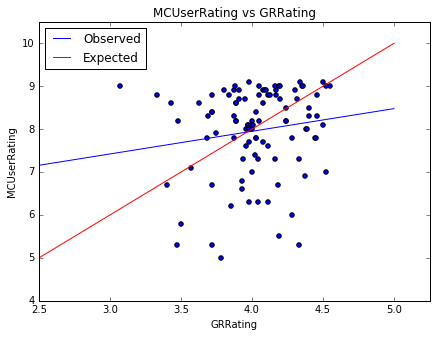

In [19]:
plotMovieRatingAgainstGR(MC_ratings, GR_ratings, 'MCUserRating', col2='GRRating', ymin=4, ymax=10, xmin=2.5, xmax=5.25, ylim=10.5)

In [20]:
MCuser_GR_OLS = getOLSResults(MC_ratings, GR_ratings, 'MCUserRating', col2='GRRating')

MCUserRating ~ GRRating


In [21]:
MCuser_GR_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           MCUserRating   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     2.280
Date:                Thu, 28 Jan 2016   Prob (F-statistic):              0.134
Time:                        15:32:34   Log-Likelihood:                -143.65
No. Observations:                 101   AIC:                             291.3
Df Residuals:                      99   BIC:                             296.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      5.8366      1.414      4.129      0.000         3.032     8.641
GRRating       0.5282      0.350      1.510      0.134        -0.166     1.222
==============================================================================
Omnibus:                       17.066   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.067
Skew:                          -1.069   Prob(JB):                     4.39e-05
Kurtosis:                       3.443   Cond. No.                         60.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Compare MC Critic ratings to Goodreads User ratings (what 538 did)

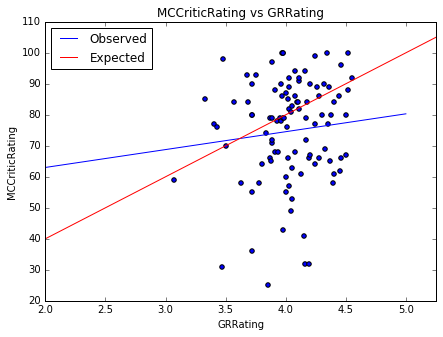

In [22]:
plotMovieRatingAgainstGR(MC_ratings, GR_ratings, 'MCCriticRating', col2='GRRating', ymin=20, ymax=100, xmin=2, xmax=5.25, ylim=110)

In [23]:
MCcritic_GR_OLS = getOLSResults(MC_ratings, GR_ratings, 'MCCriticRating', col2='GRRating')

MCCriticRating ~ GRRating


In [24]:
MCcritic_GR_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         MCCriticRating   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.8920
Date:                Thu, 28 Jan 2016   Prob (F-statistic):              0.347
Time:                        15:32:34   Log-Likelihood:                -441.22
No. Observations:                 103   AIC:                             886.4
Df Residuals:                     101   BIC:                             891.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     51.4807     24.708      2.084      0.040         2.467   100.494
GRRating       5.7669      6.106      0.944      0.347        -6.346    17.880
==============================================================================
Omnibus:                       17.632   Durbin-Watson:                   2.128
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.579
Skew:                          -0.993   Prob(JB):                     3.40e-05
Kurtosis:                       3.921   Cond. No.                         60.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
z_MC_GR_movies = getZscoreDiffofMovieAndBook(MC_ratings, GR_ratings, 'MCCriticRating', 'GRRating', want='bettermovies')
    

/Users/kenn/Learning/ds/metis/projects/luther/ken_m/MovieBookAnalysis.py:169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[(col+'_zscore')] = (df[col] - df[col].mean())/df[col].std(ddof=0)


In [26]:
z_MC_GR_movies.head(10)

,Title,MCCriticRating,GRRating,ZS_diff
30,Metropolis,98,3.48,2.617807
75,The Iron Giant,85,3.33,2.286659
84,The Servant,93,3.68,1.792019
71,The Graduate,77,3.40,1.642973
93,"Crouching Tiger, Hidden Dragon",93,3.75,1.602297
31,Rocco and His Brothers,84,3.57,1.579441
72,Scent of a Woman,59,3.07,1.515952
11,Apocalypse Now,90,3.72,1.513370
63,Catch Me If You Can,76,3.43,1.504919
40,Rififi,97,3.89,1.449837


## IMDB fit with other categories

In [34]:
IMDB_w_RuntimeR = getOLSResults(IMDB_ratings, GR_ratings, 'IMDBRating', col2='GRRating', col3='Runtime', col4='G', col5='PG', col6='PG13', col7='R')
IMDB_w_RuntimeR.summary()

IMDBRating ~ GRRating + Runtime + G + PG + PG13 + R


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             IMDBRating   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     2.574
Date:                Thu, 28 Jan 2016   Prob (F-statistic):             0.0189
Time:                        15:32:35   Log-Likelihood:                 18.215
No. Observations:                 335   AIC:                            -22.43
Df Residuals:                     328   BIC:                             4.270
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      7.7925      0.149     52.313      0.000         7.499     8.086
GRRating       0.0671      0.037      1.798      0.073        -0.006     0.141
Runtime        0.0005      0.000      1.303      0.193        -0.000     0.001
G             -0.0671      0.084     -0.796      0.427        -0.233     0.099
PG            -0.0296      0.047     -0.627      0.531        -0.123     0.063
PG13          -0.0008      0.048     -0.017      0.987        -0.094     0.093
R              0.0865      0.037      2.338      0.020         0.014     0.159
==============================================================================
Omnibus:                      114.749   Durbin-Watson:                   2.072
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              340.522
Skew:                           1.572   Prob(JB):                     1.14e-74
Kurtosis:                       6.809   Cond. No.                     1.56e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [64]:
IMDBrating_v_R10 = getOLSResults(IMDB_ratings, GR_ratings, 'IMDBRating', col2='IMDBRatingCount', col3='Runtime', col4='R', col5='GRRating', col6='IMDBRatingCount', transformDV='', transformIV1='square')
IMDBrating_v_R10.summary()

IMDBRating ~ np.square(IMDBRatingCount) + Runtime + R + GRRating + IMDBRatingCount


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             IMDBRating   R-squared:                       0.256
Model:                            OLS   Adj. R-squared:                  0.246
Method:                 Least Squares   F-statistic:                     23.72
Date:                Thu, 28 Jan 2016   Prob (F-statistic):           1.70e-20
Time:                        20:31:03   Log-Likelihood:                 67.406
No. Observations:                 350   AIC:                            -122.8
Df Residuals:                     344   BIC:                            -99.66
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------
Intercept                      8.0337      0.060    133.692      0.000         7.915     8.152
np.square(IMDBRatingCount)  6.759e-13   1.44e-13      4.706      0.000      3.93e-13  9.58e-13
Runtime                    -4.615e-05      0.000     -0.141      0.888        -0.001     0.001
R                              0.0158      0.035      0.453      0.651        -0.053     0.084
GRRating                       0.0174      0.013      1.353      0.177        -0.008     0.043
IMDBRatingCount            -9.482e-08   1.38e-07     -0.687      0.492     -3.66e-07  1.76e-07
==============================================================================
Omnibus:                      136.420   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              578.858
Skew:                           1.651   Prob(JB):                    2.01e-126
Kurtosis:                       8.366   Cond. No.                     1.15e+12
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+12. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [105]:
IMDBrating_v_R11 = getOLSResults(IMDB_ratings, GR_ratings, 'IMDBRating', col2='IMDBRatingCount', transformDV='', transformIV1='square')
IMDBrating_v_R11.summary()

IMDBRating ~ np.square(IMDBRatingCount)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             IMDBRating   R-squared:                       0.249
Model:                            OLS   Adj. R-squared:                  0.247
Method:                 Least Squares   F-statistic:                     116.5
Date:                Thu, 28 Jan 2016   Prob (F-statistic):           1.18e-23
Time:                        22:45:45   Log-Likelihood:                 66.744
No. Observations:                 354   AIC:                            -129.5
Df Residuals:                     352   BIC:                            -121.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------
Intercept                      8.0913      0.011    725.472      0.000         8.069     8.113
np.square(IMDBRatingCount)  5.946e-13   5.51e-14     10.794      0.000      4.86e-13  7.03e-13
==============================================================================
Omnibus:                      138.913   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              595.971
Skew:                           1.662   Prob(JB):                    3.86e-130
Kurtosis:                       8.418   Cond. No.                     2.11e+11
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.11e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

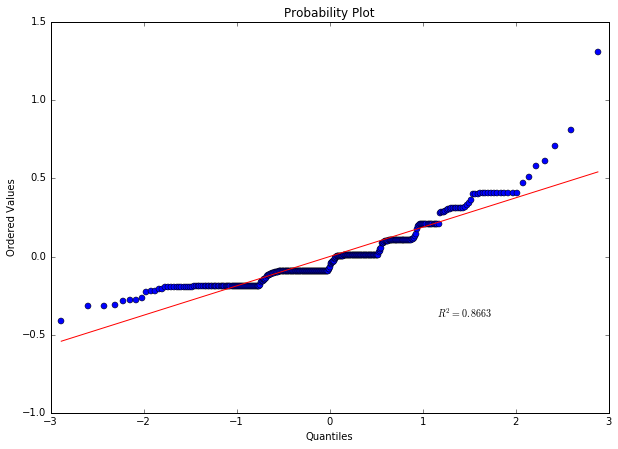

In [107]:
getQQPlot(IMDBrating_v_R11)

In [123]:
IMDBrating_v_R12 = getOLSResults(IMDB_ratings, GR_ratings, 'IMDBRating', col2='IMDBRatingCount', transformDV='boxcox', transformIV1='square')
IMDBrating_v_R12.summary()

stats.boxcox(IMDBRating)[0] ~ np.square(IMDBRatingCount)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     stats.boxcox(IMDBRating)[0]   R-squared:                        -inf
Model:                                     OLS   Adj. R-squared:                   -inf
Method:                          Least Squares   F-statistic:                    -352.0
Date:                         Thu, 28 Jan 2016   Prob (F-statistic):               1.00
Time:                                 23:00:52   Log-Likelihood:                 13241.
No. Observations:                          354   AIC:                        -2.648e+04
Df Residuals:                              352   BIC:                        -2.647e+04
Df Model:                                    1                                         
Covariance Type:                     nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------
Intercept                      0.0506   7.67e-19   6.61e+16      0.000         0.051     0.051
np.square(IMDBRatingCount)  5.522e-30   3.79e-30      1.458      0.146     -1.92e-30   1.3e-29
==============================================================================
Omnibus:                      480.117   Durbin-Watson:                   0.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            33467.168
Skew:                          -6.899   Prob(JB):                         0.00
Kurtosis:                      48.592   Cond. No.                     2.11e+11
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.11e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

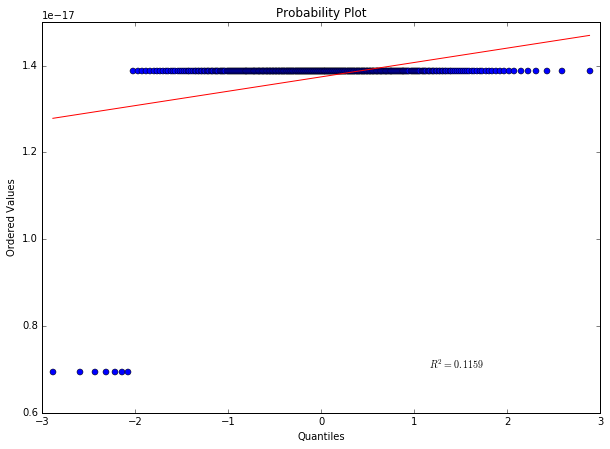

In [124]:
getQQPlot(IMDBrating_v_R12)

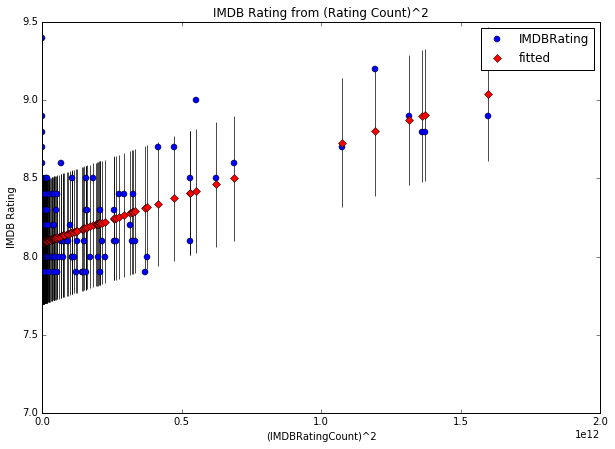

In [122]:
plotByResults(IMDBrating_v_R11, title='IMDB Rating from (Rating Count)^2', xlabel='(IMDBRatingCount)^2', ylabel='IMDB Rating', xlim=[1, 2000000000000], ylim=[7, 9.5], iv=1)